In [21]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [15]:
df = pd.read_csv("scIB/kidney_hvg5k.csv").iloc[:-1,:]
df

,Embedding,Isolated labels,Leiden NMI,Leiden ARI,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
0,X_pca,0.36739728,0.3952068131406567,0.12615357945913527,0.24552876468343926,0.04436489091473218,0.2708227038383484,0.9936102214344045,0.71780425,0.0004119608137342665,0.11179723014162911,0.2852065680089281,0.0,0.22304400241312808,0.34901203600257197,0.2986248225667944
1,X_umap,0.34435242,0.27769618571169924,0.061269840791123194,0.27369279291238846,0.028180476704035697,0.21814194321632385,0.976758288827172,0.6542194,0.03416364722781711,0.020069987502774958,0.0683056157774813,0,0.15535172789397306,0.31144170747249816,0.24900571564108812
2,X_tsne,0.35006848,0.3796700081298641,0.0940681620614626,0.35359375430634843,0.04904019281699455,0.2255803942680359,0.9905421160121652,0.62133205,0.0027028189765082467,0.019787382035083317,0.11008509607220526,0,0.15078146929072178,0.34893758676732184,0.2696751397766818
3,Harmony,0.35252568,0.3567493782578454,0.10871879430344422,0.18948693163602234,0.03346394879256376,0.2737206816673279,0.9933901266618208,0.7285,0.00042186843024359807,0.1044866411574304,0.273762765876816,0.9348600226572199,0.4084062613409557,0.3297222203680389,0.3611958367572056
4,Scanorama,0.4622168,0.5086625550391414,0.19917109568053076,0.39354527792239685,0.06640841835515726,0.36359719932079315,0.9961543809921346,0.7891281,0.0017773177888658312,0.16565752939538403,0.4183451176969712,0,0.27498161791902376,0.42710796025728115,0.3662574233219782
5,X_scVI,0.55461025,0.673211608786976,0.4110034638697411,0.6189246565681238,0.15087355919033166,0.46487994864583015,0.9995185500160259,0.85642374,0.0019733640882703993,0.2094964990168306,0.7754718410867897,0,0.3686730879620964,0.5532888627796285,0.47944255285261567
6,X_scANVI,0.55814636,0.6869399386823052,0.31439670769551165,0.6360278969470622,0.16719320819053746,0.46930776722729206,0.9996453937999705,0.84893215,0.0023768742879231772,0.21136580388262902,0.7704776557660773,0,0.3666304961925383,0.547379610011285,0.4750799644837863
7,X_bbknn,0.32174024,0.21848229251869036,0.03840393799725607,0.2187745148656409,0.020996058960953107,0.22865939140319824,0.9699820452195438,0.6982274,0.10475863350762261,0.005034832658231051,0.052718329494866684,0,0.1721478402417632,0.2881483544034157,0.24174814873875466
8,scPoli,0.5415632,0.7393185565824496,0.45769416130312224,0.6802527302450923,0.22236982745306097,0.4815757032483816,0.9993500779656803,0.80956674,0.021346886952718098,0.24892166746554903,0.7445422274255105,0,0.36487550361301824,0.5888748956670484,0.4992751388454363


In [30]:
def create_grouped_barplot(df, embedding_col, value_cols, figsize=(12, 4), 
                         colors=['#8884d8', '#82ca9d', '#ffc658'],
                         title='scIB Comparison by Embeddings on Kidney, HVG 5k'):
    """
    Create a grouped bar plot comparing different metrics across embedding types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the data
    embedding_col : str
        Name of the column containing embedding types
    value_cols : list
        List of column names to plot
    figsize : tuple
        Figure size (width, height)
    colors : list
        List of colors for the bars
    title : str
        Title for the figure
    """
    # Create a copy of the dataframe to avoid modifying the original
    plot_df = df.copy()
    
    # Convert numeric columns from string to float
    for col in value_cols:
        plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set the positions for the bars
    x = np.arange(len(plot_df[embedding_col]))
    width = 0.25  # Width of the bars
    
    # Create bars for each metric
    for i, (col, color) in enumerate(zip(value_cols, colors)):
        offset = width * (i - 1)  # Center the groups
        ax.bar(x + offset, plot_df[col], width, label=col, color=color)
    
    # Customize the plot
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(plot_df[embedding_col], rotation=15, ha='right')
    ax.legend()
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    sns.despine()
    
    # Format y-axis to show fewer decimal places
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

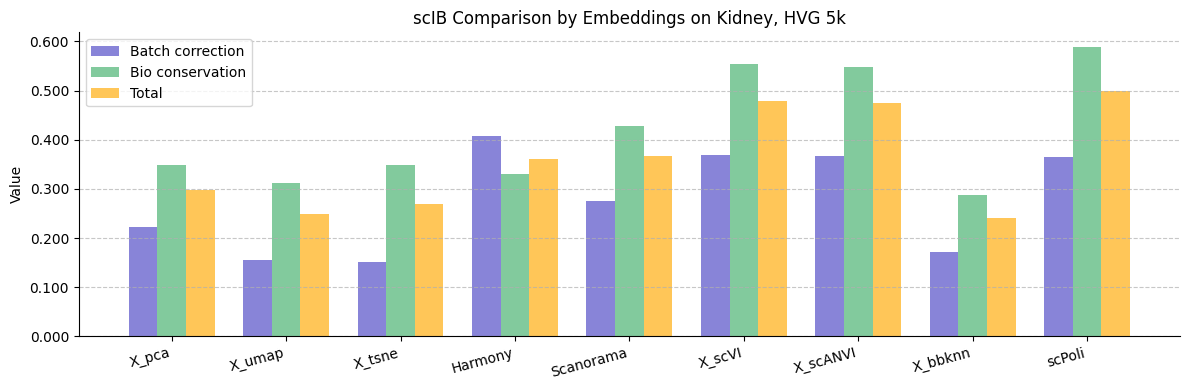

In [31]:
fig = create_grouped_barplot(
    df=df,
    embedding_col='Embedding',
    value_cols=['Batch correction', 'Bio conservation', 'Total'], 
    title='scIB Comparison by Embeddings on Kidney, HVG 5k'
)

plt.show()

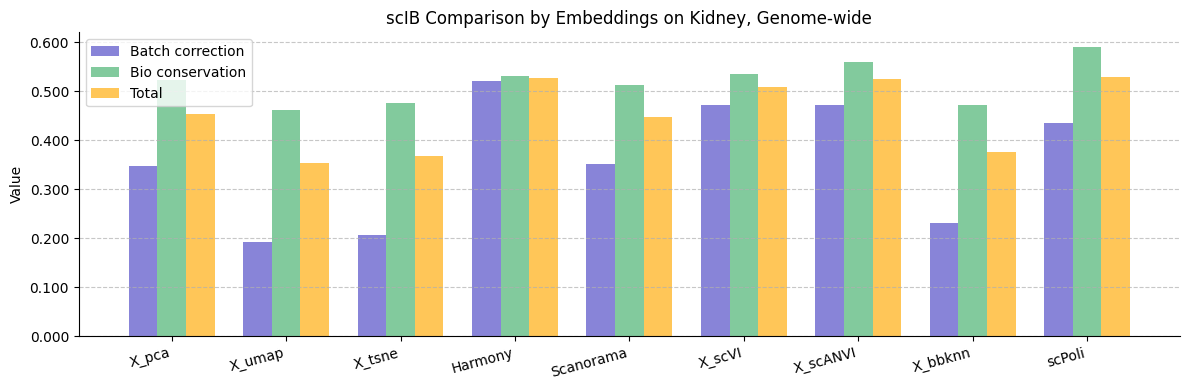

In [33]:
df = pd.read_csv("scIB/kidney_full.csv").iloc[:-1,:]

fig = create_grouped_barplot(
    df=df,
    embedding_col='Embedding',
    value_cols=['Batch correction', 'Bio conservation', 'Total'], 
    title='scIB Comparison by Embeddings on Kidney, Genome-wide'
)

plt.show()